In [1]:
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
%pip install apyori

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#tahap awal dalam analisis data yang bertujuan untuk
#memahami dan menyiapkan data mentah sebelum dilakukan tahap analisis lebih lanjut
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
m=df.mean()
sd=df.std()
sk=df.skew()
kur=df.kurt()
var=('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome')

In [6]:
df2=pd.DataFrame({'Features':var, 'Mean': m, 'SD': sd, 'Skewness': sk,'Kurtosis':kur})
df2

,Features,Mean,SD,Skewness,Kurtosis
Pregnancies,Pregnancies,3.845052,3.369578,0.901674,0.159220
Glucose,Glucose,120.894531,31.972618,0.173754,0.640780
BloodPressure,BloodPressure,69.105469,19.355807,-1.843608,5.180157
SkinThickness,SkinThickness,20.536458,15.952218,0.109372,-0.520072
Insulin,Insulin,79.799479,115.244002,2.272251,7.214260
BMI,BMI,31.992578,7.884160,-0.428982,3.290443
DiabetesPedigreeFunction,DiabetesPedigreeFunction,0.471876,0.331329,1.919911,5.594954
Age,Age,33.240885,11.760232,1.129597,0.643159
Outcome,Outcome,0.348958,0.476951,0.635017,-1.600930


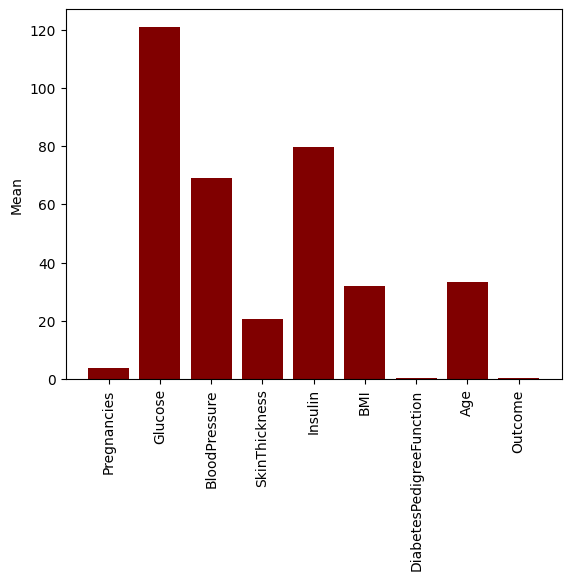

In [7]:
x_coords = np.arange(len(df2))
plt.bar(x_coords, df2['Mean'],tick_label=df2['Features'],color='maroon')
plt.xticks(rotation=90)
plt.ylabel('Mean')
plt.show()

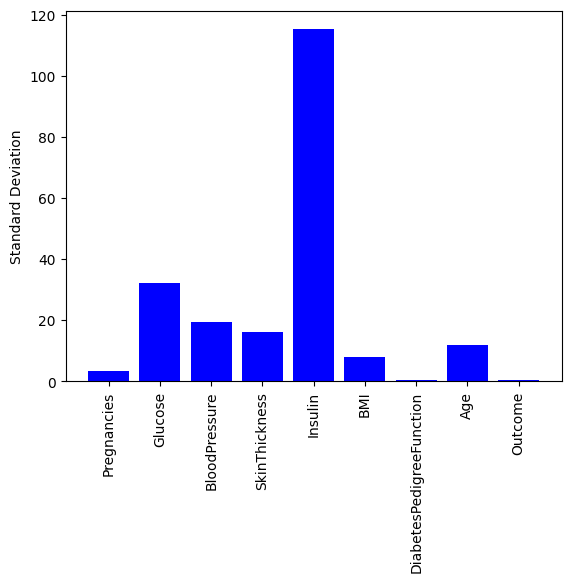

In [8]:
x_coords = np.arange(len(df2))
plt.bar(x_coords, df2['SD'],tick_label=df2['Features'],color='blue')
plt.xticks(rotation=90)
plt.ylabel('Standard Deviation')
plt.show()

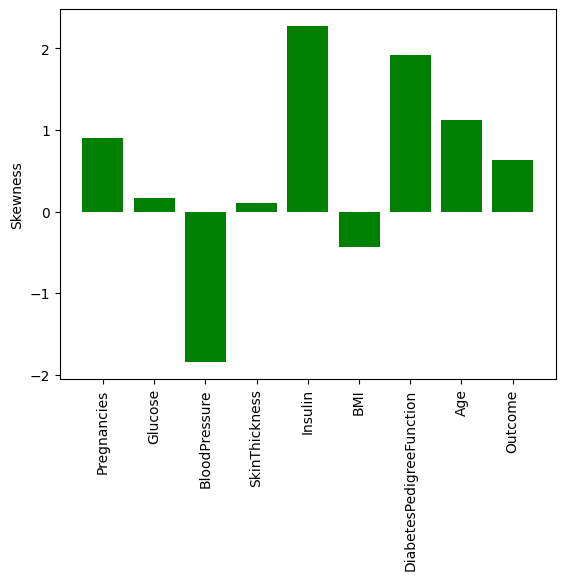

In [9]:
x_coords = np.arange(len(df2))
plt.bar(x_coords, df2['Skewness'],tick_label=df2['Features'],color='green')
plt.xticks(rotation=90)
plt.ylabel('Skewness')
plt.show()

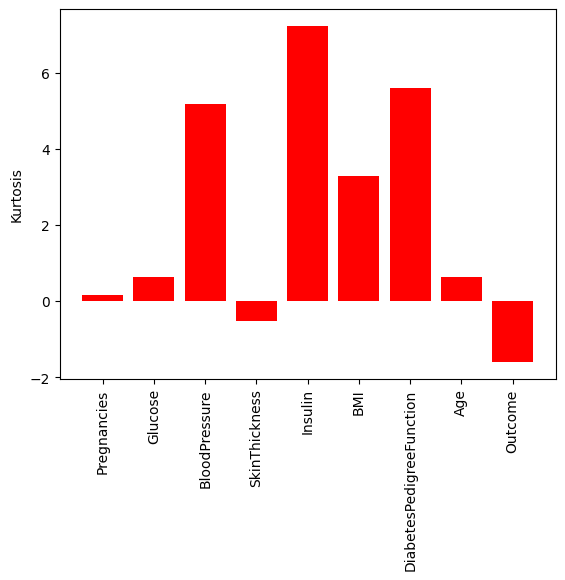

In [10]:
x_coords = np.arange(len(df2))
plt.bar(x_coords, df2['Kurtosis'],tick_label=df2['Features'],color='red')
plt.xticks(rotation=90)
plt.ylabel('Kurtosis')
plt.show()

In [11]:
#klasifikasi sebuah teknik untuk mengklasifikasikan atau
#mengkategorikan beberapa item yang belum berlabel ke dalam sebuah set kelas diskrit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
# Baca data dari file CSV
data = pd.read_csv('diabetes.csv')

In [13]:
# Pisahkan atribut dan label
X = data.drop('Pregnancies', axis=1)
y = data['Pregnancies']

In [14]:
# Bagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Inisialisasi model Decision Tree
model = DecisionTreeClassifier()

In [16]:
# Latih model dengan data pelatihan
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# Lakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

In [18]:
# Hitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi:', accuracy)

Akurasi: 0.15584415584415584


In [19]:
#regresi suatu teknik analisis untuk mengidentifikasi relasi atau hubungan diantara dua variabel atau lebih
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
data = pd.read_csv('diabetes.csv')

In [21]:
# Pisahkan variabel independen dan dependen
X = data[['Age', 'BMI', 'BloodPressure']]  # Variabel independen
y = data['Glucose']  # Variabel dependen

In [22]:
# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Buat objek model regresi linear
model = LinearRegression()

In [24]:
# Latih model menggunakan set pelatihan
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Lakukan prediksi menggunakan set pengujian
y_pred = model.predict(X_test)

In [26]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
# Cetak hasil evaluasi
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 899.8468451632392
R-squared: 0.10579468695679684


In [28]:
# Cetak koefisien regresi
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)

        Variable  Coefficient
0            Age     0.719247
1            BMI     0.794172
2  BloodPressure     0.083866


In [29]:
#Analisa Asosiasi digunakan untuk menemukan pola-pola hubungan atau asosiasi antara item-item dalam kumpulan data
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

In [30]:
data = pd.read_csv('diabetes.csv')

In [31]:
# Save model
with open('DTRmodel.pkl', 'wb') as file:
    pickle.dump(model, file)

In [32]:
# Pilih variabel yang akan digunakan dalam analisis asosiasi
X = data[['Glucose', 'BMI', 'SkinThickness', 'Age']]

In [33]:
# Konversi variabel numerik menjadi variabel kategorikal
X['Glucose'] = pd.qcut(X['Glucose'], q=3, labels=['Low', 'Medium', 'High'])
X['BMI'] = pd.qcut(X['BMI'], q=3, labels=['Low', 'Medium', 'High'])
X['SkinThickness'] = pd.qcut(X['SkinThickness'], q=3, labels=['Low','Medium', 'High'])
X['Age'] = pd.qcut(X['Age'], q=3, labels=['young', 'Middle-aged', 'Elderly'])

C:\Users\rahma\AppData\Local\Temp\ipykernel_26968\147954089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Glucose'] = pd.qcut(X['Glucose'], q=3, labels=['Low', 'Medium', 'High'])
C:\Users\rahma\AppData\Local\Temp\ipykernel_26968\147954089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BMI'] = pd.qcut(X['BMI'], q=3, labels=['Low', 'Medium', 'High'])
C:\Users\rahma\AppData\Local\Temp\ipykernel_26968\147954089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [34]:
#Clustering digunakan untuk mengelompokkan data ke dalam kelompok-kelompok yang
#memiliki kesamaan berdasarkan karakteristik atau pola yang ada dalam data.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('diabetes.csv')

In [36]:
# Pilih variabel yang akan digunakan dalam clustering
X = data[['Glucose', 'BMI', 'Insulin']]

In [37]:
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# Terapkan algoritma K-means dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [39]:
# Melabeli data dengan hasil cluster
data['Cluster'] = kmeans.labels_

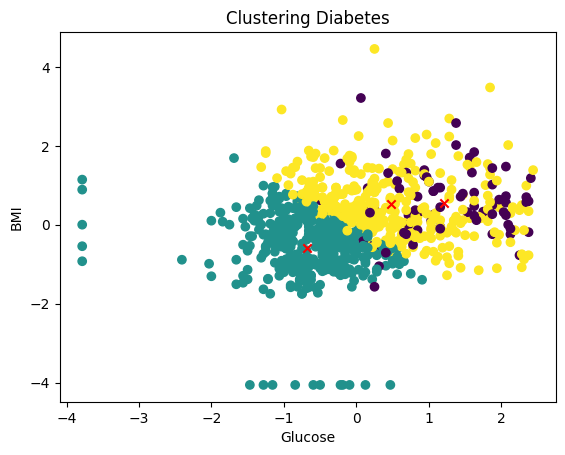

In [40]:
# Visualisasi hasil clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Clustering Diabetes')
plt.show()

In [41]:
#Deteksi Anomali digunakan untuk mengidentifikasi data yang berbeda
#secara signifikan atau tidak biasa dari pola umum dalam kumpulan data.
from sklearn.ensemble import IsolationForest

In [42]:
data = pd.read_csv('diabetes.csv')

In [43]:
# Pilih variabel yang akan digunakan dalam deteksi anomali
X = data[['Glucose', 'BMI', 'Insulin']]

In [44]:
# Terapkan algoritma Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(X)

IsolationForest(contamination=0.05, random_state=42)

In [45]:
# Melabeli data dengan hasil deteksi anomali (1 untuk data normal, -1 untuk data anomali)
data['Anomaly'] = isolation_forest.predict(X)

In [46]:
# Menampilkan data yang terdeteksi sebagai anomali
anomaly_data = data[data['Anomaly'] == -1]
print(anomaly_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
13             1      189             60             23      846  30.1   
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
75             1        0             48             20        0  24.7   
81             2       74              0              0        0   0.0   
111            8      155             62             26      495  34.0   
145            0      102             75             23        0   0.0   
153            1      153             82             42      485  40.6   
177            0      129            110             46      130  67.1   
182            1        0             74             20       23  27.7   
186            8      181             